In [1]:
#import gpu
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')

for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
# Lib for preprocessing
from PIL import Image
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Lib for model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam , Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout


print("Done")

Done


In [5]:
folder_training = r"/kaggle/input/brain2/brain-20241015T171042Z-001/brain/Training"
Path = []
Labels = []

#to get the path for each Img :

folders_path = os.listdir(folder_training)
for img in folders_path :
    FolderPath = os.path.join(folder_training, img)
    FolderName = os.listdir(FolderPath)
    for path in FolderName :
        Images_path = os.path.join(FolderPath, path)

        Path.append(Images_path)
        Labels.append(img)

# to creat DataFrame
Pseries = pd.Series(Path, name = "Img_Path")
Lseries = pd.Series(Labels, name = "Img_label")
df_train = pd.concat([Pseries, Lseries], axis=1)

In [6]:
df_train

,Img_Path,Img_label
0,/kaggle/input/brain2/brain-20241015T171042Z-00...,pituitary
1,/kaggle/input/brain2/brain-20241015T171042Z-00...,pituitary
2,/kaggle/input/brain2/brain-20241015T171042Z-00...,pituitary
3,/kaggle/input/brain2/brain-20241015T171042Z-00...,pituitary
4,/kaggle/input/brain2/brain-20241015T171042Z-00...,pituitary
...,...,...
5707,/kaggle/input/brain2/brain-20241015T171042Z-00...,glioma
5708,/kaggle/input/brain2/brain-20241015T171042Z-00...,glioma
5709,/kaggle/input/brain2/brain-20241015T171042Z-00...,glioma
5710,/kaggle/input/brain2/brain-20241015T171042Z-00...,glioma


In [7]:
folder_test = r"/kaggle/input/brain2/brain-20241015T171042Z-001/brain/Testing"
Path = []
Labels = []

# To get the path for each image in the test set:

folders_path = os.listdir(folder_test)  # Use folder_test here
for img in folders_path:
    FolderPath = os.path.join(folder_test, img)  # Use folder_test here
    FolderName = os.listdir(FolderPath)
    for path in FolderName:
        Images_path = os.path.join(FolderPath, path)

        Path.append(Images_path)
        Labels.append(img)

# To create DataFrame
Pseries = pd.Series(Path, name = "Img_Path")
Lseries = pd.Series(Labels, name = "Img_label")
df_test = pd.concat([Pseries, Lseries], axis=1)

In [8]:
df_test

,Img_Path,Img_label
0,/kaggle/input/brain2/brain-20241015T171042Z-00...,pituitary
1,/kaggle/input/brain2/brain-20241015T171042Z-00...,pituitary
2,/kaggle/input/brain2/brain-20241015T171042Z-00...,pituitary
3,/kaggle/input/brain2/brain-20241015T171042Z-00...,pituitary
4,/kaggle/input/brain2/brain-20241015T171042Z-00...,pituitary
...,...,...
1306,/kaggle/input/brain2/brain-20241015T171042Z-00...,glioma
1307,/kaggle/input/brain2/brain-20241015T171042Z-00...,glioma
1308,/kaggle/input/brain2/brain-20241015T171042Z-00...,glioma
1309,/kaggle/input/brain2/brain-20241015T171042Z-00...,glioma


In [9]:
valid_df, test_df = train_test_split(df_test, train_size=0.5, shuffle= True, random_state=42)

In [10]:
batch_size = 16
img_size = (224, 224)

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

train_generator = tr_gen.flow_from_dataframe(
    df_train,
    x_col='Img_Path',  # Use the correct column name for file paths
    y_col='Img_label', # Use the correct column name for labels
    target_size=img_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

valid_generator = ts_gen.flow_from_dataframe(
    valid_df,
    x_col='Img_Path',  # Use the correct column name for file paths
    y_col='Img_label', # Use the correct column name for labels
    target_size=img_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

test_generator = ts_gen.flow_from_dataframe(
    df_test,
    x_col='Img_Path',  # Use the correct column name for file paths
    y_col='Img_label', # Use the correct column name for labels
    target_size=img_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False,
    batch_size=batch_size
)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 1311 validated image filenames belonging to 4 classes.


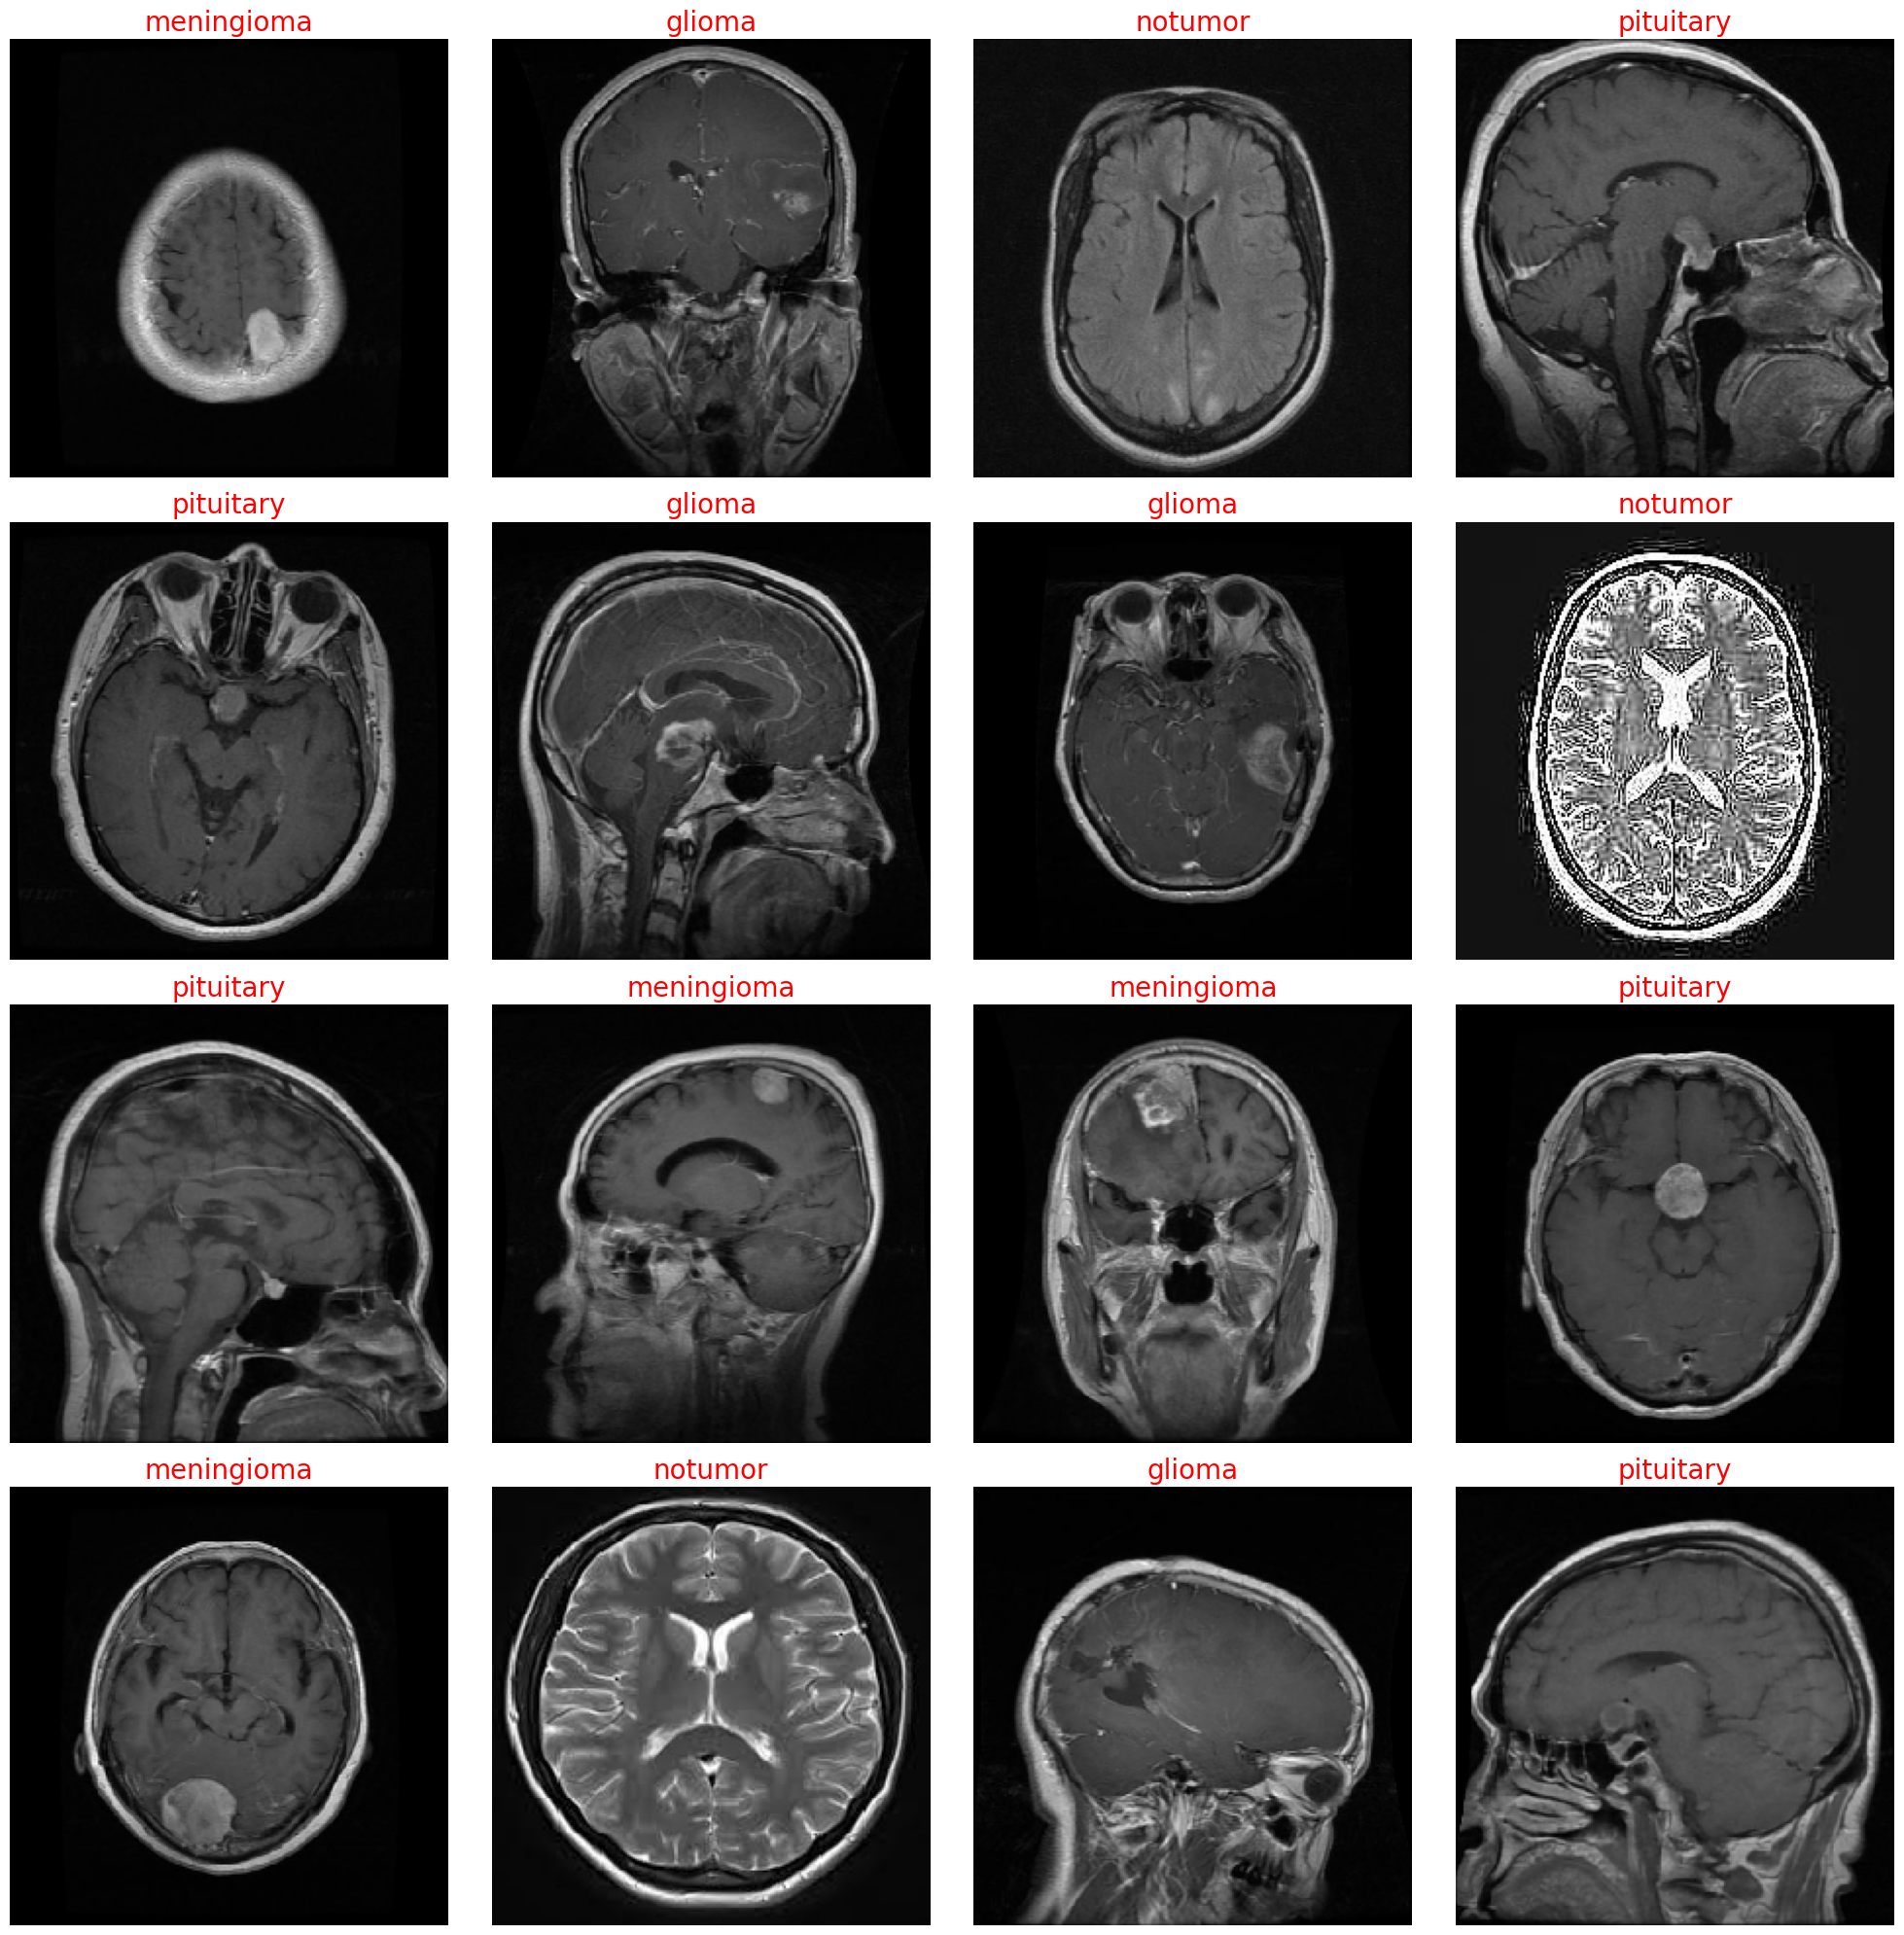

In [11]:
# Dictionary mapping class names to indices
gen_dict = train_generator.class_indices
# List of class names
classes = list(gen_dict.keys())

# Fetch a batch of images and labels
images, labels = next(train_generator)

# Set up the figure size
plt.figure(figsize=(20, 20))

# Loop through the first 20 images in the batch
for i in range(16):
    plt.subplot(4, 4, i + 1)

    # Normalize image pixel values to [0, 1] range
    image = images[i] / 255.0

    # Display the image
    plt.imshow(image)

    # Get the class index and class name
    index = np.argmax(labels[i])  # Get image index
    class_name = classes[index]   # Get class of image

    # Set the title with class name
    plt.title(class_name, color='red', fontsize=20)
    plt.axis('off')

# Adjust layout for better spacing between plots
plt.tight_layout()
# Display the plot
plt.show()


In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import EfficientNetB0


In [13]:
base_model = EfficientNetB0(weights='/kaggle/input/brain2/efficientnetb0_notop.h5', include_top=False, input_shape=(224, 224, 3))


In [14]:
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)  # For 4 classes

In [15]:
model = tf.keras.Model(inputs=base_model.input, outputs=predictions)


In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [17]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ normalization[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 112, 112,  │         64 │ block1a_project_

 Total params: 20,107,175 (76.70 MB)

 Trainable params: 20,065,152 (76.54 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [18]:
epochs =  10  # number of all epochs in training

history = model.fit(train_generator, epochs= epochs, verbose= 1, validation_data= valid_generator, shuffle= False)

Epoch 1/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 955s 3s/step - accuracy: 0.8291 - loss: 1.3772 - val_accuracy: 0.9145 - val_loss: 0.2495
Epoch 2/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 901s 3s/step - accuracy: 0.9528 - loss: 0.1390 - val_accuracy: 0.9542 - val_loss: 0.2003
Epoch 3/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 901s 3s/step - accuracy: 0.9743 - loss: 0.0737 - val_accuracy: 0.9725 - val_loss: 0.1087
Epoch 4/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 912s 3s/step - accuracy: 0.9712 - loss: 0.1029 - val_accuracy: 0.8885 - val_loss: 0.4279
Epoch 5/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 909s 3s/step - accuracy: 0.9489 - loss: 0.1730 - val_accuracy: 0.9756 - val_loss: 0.0676
Epoch 6/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 896s 3s/step - accuracy: 0.9792 - loss: 0.0800 - val_accuracy: 0.9252 - val_loss: 0.2653
Epoch 7/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 914s 2s/step - accuracy: 0.9786 - loss: 0.0828 - val_accuracy: 0.9557 - val_loss: 0.1841
Epoch 8/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 882s 2s/step - accuracy: 0.9817 - loss: 0.0530 - val_accu

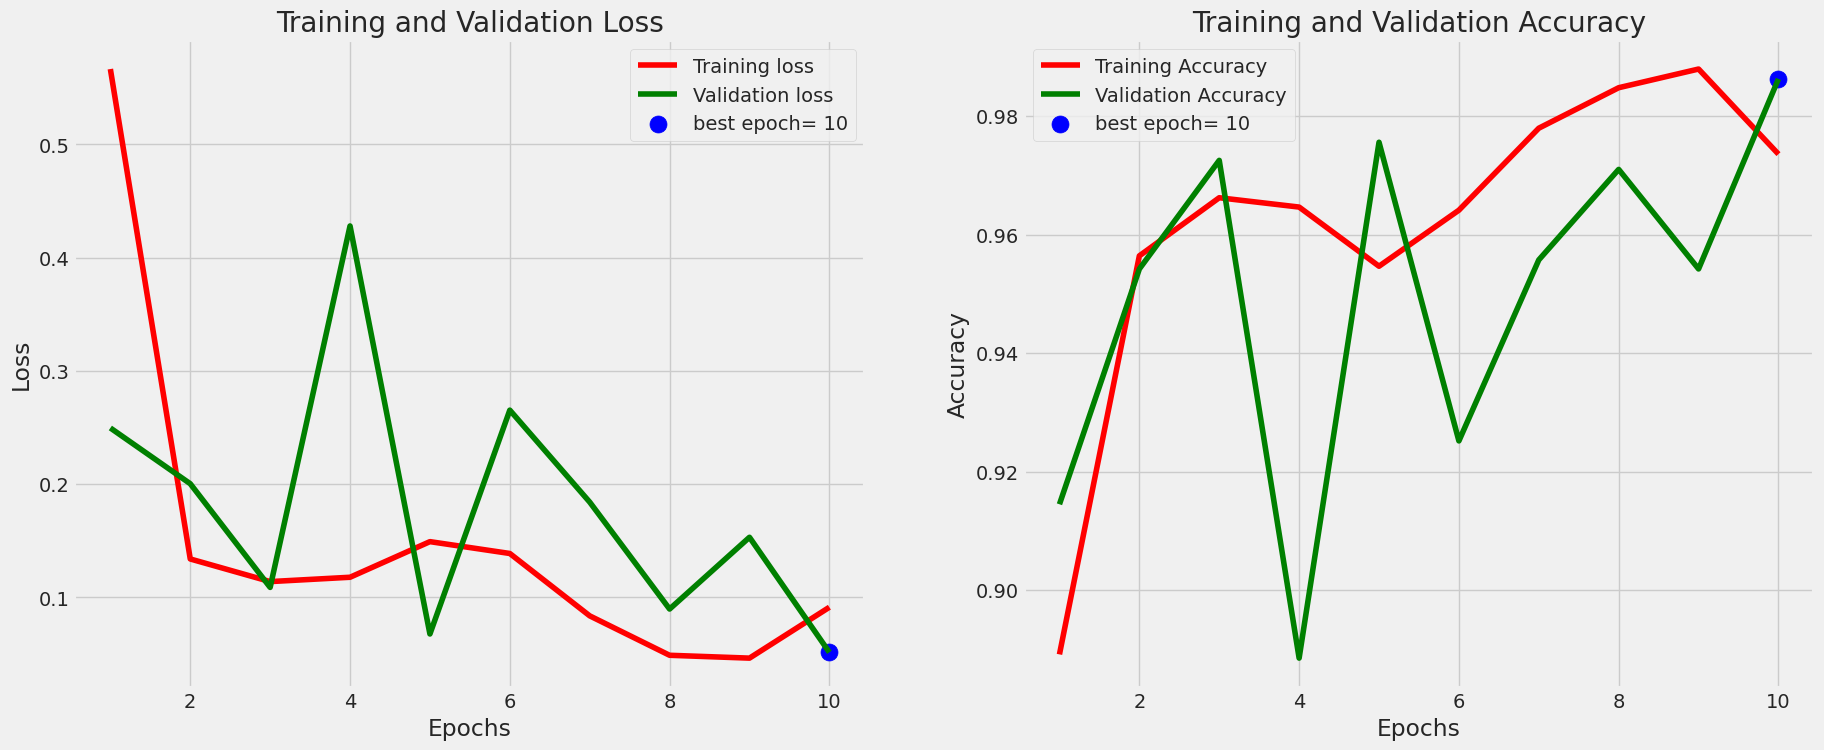

In [26]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [27]:
train_score = model.evaluate(train_generator, verbose= 1)
valid_score = model.evaluate(valid_generator, verbose= 1)
test_score = model.evaluate(test_generator, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

357/357 ━━━━━━━━━━━━━━━━━━━━ 191s 536ms/step - accuracy: 0.9928 - loss: 0.0276
41/41 ━━━━━━━━━━━━━━━━━━━━ 22s 526ms/step - accuracy: 0.9860 - loss: 0.0481
82/82 ━━━━━━━━━━━━━━━━━━━━ 44s 540ms/step - accuracy: 0.9736 - loss: 0.0933
Train Loss:  0.027473773807287216
Train Accuracy:  0.9919467568397522
--------------------
Validation Loss:  0.05141850933432579
Validation Accuracy:  0.9862595200538635
--------------------
Test Loss:  0.06016511842608452
Test Accuracy:  0.980167806148529


In [29]:
preds = model.predict(test_generator)
y_pred = np.argmax(preds, axis=1)

82/82 ━━━━━━━━━━━━━━━━━━━━ 44s 537ms/step


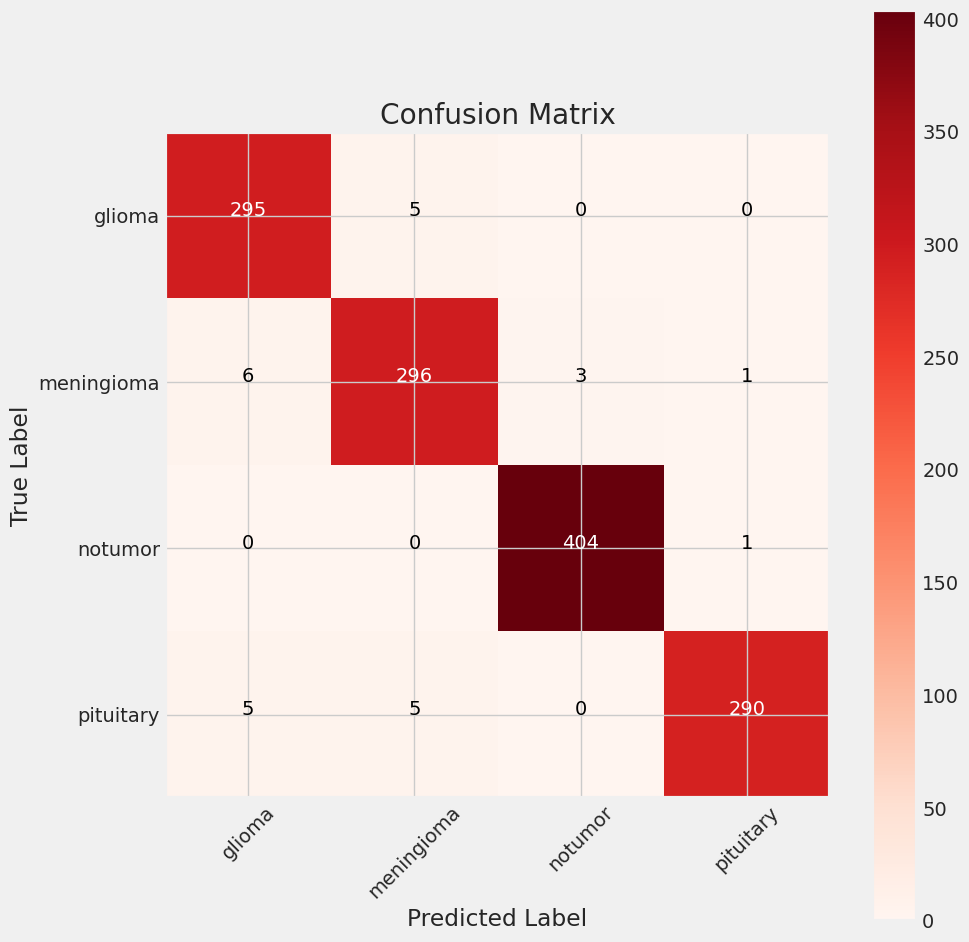

In [30]:
# Generate the class labels
g_dict = test_generator.class_indices
classes = list(g_dict.keys())

# Compute the confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation='nearest', cmap='Reds')  # Use red colormap
plt.title('Confusion Matrix')
plt.colorbar()

# Set tick marks and labels
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add text annotations
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment='center',
             color='white' if cm[i, j] > thresh else 'black')

plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [33]:
print(classification_report(test_generator.classes, y_pred, target_names= classes))

              precision    recall  f1-score   support

      glioma       0.96      0.98      0.97       300
  meningioma       0.97      0.97      0.97       306
     notumor       0.99      1.00      1.00       405
   pituitary       0.99      0.97      0.98       300

    accuracy                           0.98      1311
   macro avg       0.98      0.98      0.98      1311
weighted avg       0.98      0.98      0.98      1311



In [ ]:
#Save the model
model.save('Brain_Tumors_Classifier_efficientnetb0.h5')

In [31]:
model.save('Brain_Tumors_Classifier_efficientnetb0.keras')

In [32]:
# Load the model
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/your_shared_drive_path/Brain_Tumors_Classifier.h5', compile=False)
loaded_model.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Image path
from google.colab import files
uploaded = files.upload()

# Get the filename of the uploaded image

image_path = next(iter(uploaded))
image = Image.open(image_path)

# Preprocess the image before prediction
img = image.resize((224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

# Make predictions
predictions = loaded_model.predict(img_array)
class_labels = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']

# Print the predicted class
predicted_class = class_labels[np.argmax(predictions)]
print(predicted_class)

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/content/drive/MyDrive/your_shared_drive_path/Brain_Tumors_Classifier.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
# Example using VGG16
from tensorflow.keras.applications import VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=img_shape)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add your own classification layers
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(new_class_count, activation='softmax')(x) # new_class_count is the number of classes in your combined dataset

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Example using VGG16
from tensorflow.keras.applications import VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=img_shape)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add your own classification layers
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
new_class_count = 4 # Replace with the actual number of classes in your dataset
predictions = Dense(new_class_count, activation='softmax')(x) # new_class_count is the number of classes in your combined dataset

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Import required libraries for Grad-CAM
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras import backend as K
from PIL import Image

from google.colab import files
uploaded = files.upload()


# Load the trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/your_shared_drive_path/Brain_Tumors_Classifier.h5', compile=False)
model.compile(optimizer='adamax', loss='categorical_crossentropy', metrics=['accuracy'])

# Load an example image
uploaded = files.upload()
image_path = next(iter(uploaded))
img = Image.open(image_path)
img = img.resize((224, 224))
img_array = np.array(img)

# Preprocess the image
input_img = np.expand_dims(img_array, axis=0)
input_img = preprocess_input(input_img)

# Make predictions
predictions = model.predict(input_img)
predicted_class = np.argmax(predictions[0])
print(f'Predicted class: {predicted_class}')

# Define a function to get the Grad-CAM
def get_gradcam_heatmap(model, img_array, layer_name, class_idx):
    grad_model = Model(
        inputs=[model.inputs],
        outputs=[model.get_layer(layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)

    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs.numpy()[0]
    pooled_grads = pooled_grads.numpy()

    for i in range(pooled_grads.shape[-1]):
        conv_outputs[:, :, i] *= pooled_grads[i]

    heatmap = np.mean(conv_outputs, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)

    return heatmap

# Get the heatmap
last_conv_layer_name = 'block5_conv3'  # Adjust this depending on your model
heatmap = get_gradcam_heatmap(model, input_img, last_conv_layer_name, predicted_class)

# Display the heatmap on the image
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(img_array)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(img_array)
plt.imshow(heatmap, cmap='jet', alpha=0.5)  # Overlay heatmap with red color
plt.title('Tumor Detection with Grad-CAM')
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files
from tensorflow.keras import backend as K

# Load the model architecture and weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Adding custom layers
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)  # Ensure this matches the number of classes in your dataset

model = Model(inputs=base_model.input, outputs=predictions)

# Load the trained model weights
model.load_weights('/content/drive/MyDrive/your_shared_drive_path/Brain_Tumors_Classifier.h5')

# Load and preprocess the image
uploaded = files.upload()
image_path = next(iter(uploaded))
img = Image.open(image_path)
img = img.resize((224, 224))
img_array = np.array(img)

input_img = np.expand_dims(img_array, axis=0)
input_img = preprocess_input(input_img)

# Make predictions
predictions = model.predict(input_img)
predicted_class = np.argmax(predictions[0])
print(f'Predicted class: {predicted_class}')

# Function to get Grad-CAM heatmap
def get_gradcam_heatmap(model, img_array, layer_name, class_idx):
    grad_model = tf.keras.models.Model(
        inputs=[model.inputs],
        outputs=[model.get_layer(layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs.numpy()[0]
    pooled_grads = pooled_grads.numpy()

    for i in range(pooled_grads.shape[-1]):
        conv_outputs[:, :, i] *= pooled_grads[i]

    heatmap = np.mean(conv_outputs, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)

    return heatmap

# Get the heatmap
last_conv_layer_name = 'block5_conv3'  # Adjust this depending on your model
heatmap = get_gradcam_heatmap(model, input_img, last_conv_layer_name, predicted_class)

# Display the heatmap on the image
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(img_array)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(img_array)
plt.imshow(heatmap, cmap='jet', alpha=0.5)  # Overlay heatmap with red color
plt.title('Tumor Detection with Grad-CAM')
plt.show()


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from PIL import Image
from google.colab import files

# Upload an image file
uploaded = files.upload()

# Load the trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/your_shared_drive_path/Brain_Tumors_Classifier.h5', compile=False)
model.compile(optimizer='adamax', loss='categorical_crossentropy', metrics=['accuracy'])

# Load an example image
image_path = next(iter(uploaded))
img = Image.open(image_path)
img = img.resize((224, 224))
img_array = np.array(img)

# Preprocess the image
input_img = np.expand_dims(img_array, axis=0)
input_img = tf.keras.applications.vgg16.preprocess_input(input_img)

# Make predictions
predictions = model.predict(input_img)
predicted_class = np.argmax(predictions[0])
print(f'Predicted class: {predicted_class}')

# Ensure the model has been called at least once before creating the Grad-CAM
_ = model(input_img)

# Function to find the last Conv2D layer in the model
def get_last_conv_layer(model):
    for layer in reversed(model.layers):
        if isinstance(layer, tf.keras.layers.Conv2D):
            return layer.name
    raise ValueError("No Conv2D layer found in the model.")

# Define a function to get the Grad-CAM
def get_gradcam_heatmap(model, img_array, layer_name, class_idx):
    grad_model = Model(
        inputs=[model.inputs],
        outputs=[model.get_layer(layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)

    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs.numpy()[0]
    pooled_grads = pooled_grads.numpy()

    for i in range(pooled_grads.shape[-1]):
        conv_outputs[:, :, i] *= pooled_grads[i]

    heatmap = np.mean(conv_outputs, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)

    return heatmap

# Get the last convolutional layer name
last_conv_layer_name = get_last_conv_layer(model)

# Get the heatmap
heatmap = get_gradcam_heatmap(model, input_img, last_conv_layer_name, predicted_class)

# Display the heatmap on the image
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(img_array)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(img_array)
plt.imshow(heatmap, cmap='jet', alpha=0.5)  # Overlay heatmap with red color
plt.title('Tumor Detection with Grad-CAM')
plt.show()


-----------------------------------------------------------------------

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files
from tensorflow.keras import backend as K

# Define the model architecture
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Adding custom layers
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)  # Ensure this matches the number of classes in your dataset

model = Model(inputs=base_model.input, outputs=predictions)

# Load the trained model weights
model.load_weights('/content/drive/MyDrive/your_shared_drive_path/Brain_Tumors_Classifier.h5')


In [ ]:
jupyter nbconvert --to html /Downloads/Classification.ipynb
